In [192]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

EDA

In [193]:
# Importing dataset housing.csv
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

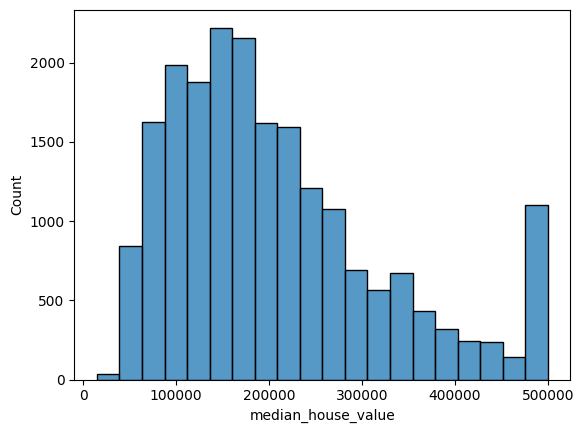

In [194]:
# Look at the median_house_value variable. Does it have a long tail?

%matplotlib inline

sns.histplot(df.median_house_value, bins = 20)

Preparing the dataset

In [203]:
# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
# Next, use only the following columns:

# 'latitude',
# 'longitude',
# 'housing_median_age',
# 'total_rooms',
# 'total_bedrooms',
# 'population',
# 'households',
# 'median_income',
# 'median_house_value'

df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [206]:
# Filtering the data
df_subset = df.loc[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND']), 
                    ['latitude',
                    'longitude',
                    'housing_median_age',
                    'total_rooms',
                    'total_bedrooms',
                    'population',
                    'households',
                    'median_income',
                    'median_house_value'
                    ] 
                  ]

In [207]:
df_subset.shape, df.shape

((15687, 9), (20640, 10))

In [208]:
df_subset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Question 1

In [209]:
# There's one feature with missing values. What is it?

df_subset.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [210]:
# What's the median (50% percentile) for variable 'population'?

df_subset['population'].median()

1195.0

Prepare and split the dataset 

In [211]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [224]:
df_subset.shape

(15687, 9)

In [225]:
n = len(df_subset)

n_val = int(len(df_subset) * 0.2)
n_test = int(len(df_subset) * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(3137, 3137, 9413)

In [228]:
indx = np.arange(len(df_subset))
indx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [229]:
# Shuffle the dataset (the filtered one you created above), use seed 42
np.random.seed(42)
np.random.shuffle(indx)
indx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [230]:
# Splitting the data in train/val/test sets, with 60%/20%/20% distribution
df_train = df_subset.iloc[indx[:n_train]]
df_val = df_subset.iloc[indx[n_train: n_train+n_val]]
df_test = df_subset.iloc[indx[n_train+n_val:]]

In [231]:
df_train.shape, df_val.shape, df_test.shape

((9413, 9), (3137, 9), (3137, 9))

In [232]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [233]:
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9235,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
11104,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
7428,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
19928,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
15534,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0


In [234]:
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11959,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1257,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
18438,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
15069,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
16227,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [235]:
# Resetting index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [236]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [237]:
# log transformation to the median_house_value variable using the np.log1p() function
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [238]:
# Deleting the target columns from the train, test and val dataset
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [239]:
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?

In [240]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [244]:
# Function to replace null values with a user input value and return a numpy array
def prepare_X(df,column ,na_replace_values):
    df =df.copy()
    df[column] = df[column].fillna(value = na_replace_values)
    df = df.values
    
    return df

In [245]:
# Function to perform linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:] 

In [246]:
# Function to get the rmse value
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [247]:
# Filling the missing value with zero
X_train_zero_missing = prepare_X(df_train, 'total_bedrooms', 0)

In [248]:
X_train_zero_missing

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [249]:
#Perfrom Linear Regression
w0, w =train_linear_regression(X_train_zero_missing, y_train)

In [251]:
w0, w

(-9.763249477872478,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [252]:
# Filling the missing value with zero to validation set
X_val = prepare_X(df_val, 'total_bedrooms', 0)

In [253]:
# Predict
y_pred = w0 + X_val.dot(w)

In [254]:
# RMSE score
score1 = round(rmse(y_val, y_pred),2)
score1

0.34

In [256]:
# Filling the missing value with mean
total_bedrooms_mean = df_train.total_bedrooms.mean()
print(total_bedrooms_mean)

X_train_mean_missing = prepare_X(df_train, 'total_bedrooms', total_bedrooms_mean)

542.552956325786


In [257]:
X_train_mean_missing

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [258]:
# Perform Linear Regression
w0, w =train_linear_regression(X_train_mean_missing, y_train)

In [259]:
w0, w

(-9.886133215408377,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [260]:
# Filling the missing value with mean for validation dataset
X_val = prepare_X(df_val, 'total_bedrooms', total_bedrooms_mean)

In [261]:
# Prediction
y_pred = w0 + X_val.dot(w)

In [262]:
# RMSE score
score2 = round(rmse(y_val, y_pred),2)
score2

0.34

In [263]:
score1 == score2

True

# Question 4

In [264]:
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE? -->

In [265]:
# Function to replace null values with a user input value and return a numpy array
def prepare_X_zero_fill(df):
    df =df.copy()
    df = df.fillna(value = 0).values

    return df

In [266]:
# Function to perform linear regression with reguarization
def train_linear_regression_regularised(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # regularization

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [267]:
# Perform linear regreiion on different values of r
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    X_train = prepare_X_zero_fill(df_train)
    w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

    X_val = prepare_X_zero_fill(df_val)

    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)

    print(f'r value: {r}, weight: {w0}, score: {score}')

r value: 0, weight: -9.763249477872478, score: 0.34
r value: 1e-06, weight: -9.763228830761964, score: 0.34
r value: 0.0001, weight: -9.761185235634128, score: 0.34
r value: 0.001, weight: -9.742646249295081, score: 0.34
r value: 0.01, weight: -9.56105619328998, score: 0.34
r value: 0.1, weight: -8.058889769412012, score: 0.34
r value: 1, weight: -3.1331542783180195, score: 0.34
r value: 5, weight: -0.84108679750481, score: 0.35
r value: 10, weight: -0.43811723158933275, score: 0.35


# Question 5

In [268]:
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [269]:
n = len(df_subset)
n_val = int(len(df_subset) * 0.2)
n_test = int(len(df_subset) * 0.2)
n_train = n - n_val - n_test

score_list = []

# Trying different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    # shuffle the index as per the seed
    indx = np.arange(len(df_subset))
    np.random.seed(seed)
    np.random.shuffle(indx)

    #filter datasets
    df_train = df_subset.iloc[indx[:n_train]]
    df_val = df_subset.iloc[indx[n_train: n_train+n_val]]
    df_test = df_subset.iloc[indx[n_train+n_val:]]

    #Reset index as there will be shuffled ones
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    #Log transformation for the median_house_value and setting it as a target array
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    #dropping the column from feature datafame
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    #Training the data
    X_train = prepare_X_zero_fill(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero_fill(df_val)

    # Predicting
    y_pred = w0 + X_val.dot(w)

    #Rmse score
    score = rmse(y_val, y_pred)
    score_list.append(score)
    
    print(f'seed value: {seed}, score: {score}')

seed value: 0, score: 0.3377387160043232
seed value: 1, score: 0.3377999353665378
seed value: 2, score: 0.3384287006753424
seed value: 3, score: 0.3320049468303904
seed value: 4, score: 0.3394451862555887
seed value: 5, score: 0.34338197052659875
seed value: 6, score: 0.3385330211769949
seed value: 7, score: 0.34687476972995646
seed value: 8, score: 0.35127368659627967
seed value: 9, score: 0.33415582665206545


In [271]:
# Getting the standard deviation of score list
print(score_list)
std = np.std(score_list)
print(f' Standard deviation of the scores {round(std, 3)}')

[0.3377387160043232, 0.3377999353665378, 0.3384287006753424, 0.3320049468303904, 0.3394451862555887, 0.34338197052659875, 0.3385330211769949, 0.34687476972995646, 0.35127368659627967, 0.33415582665206545]
 Standard deviation of the scores 0.005


# Question 6

In [272]:
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [273]:
indx = np.arange(len(df_subset))
np.random.seed(9)
np.random.shuffle(indx)

df_train = df_subset.iloc[indx[:n_train]]
df_val = df_subset.iloc[indx[n_train: n_train+n_val]]
df_test = df_subset.iloc[indx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop= True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X_zero_fill(df_full_train)
w0, w = train_linear_regression_regularised(X_full_train, y_full_train, r = 0.001)

X_test = prepare_X_zero_fill(df_test)

y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print(f'RMSE SCORE: {round(score,2)}')

RMSE SCORE: 0.33


End